# 实验五：层次聚类
- 姓名：冯思程
- 学号：2112213
- 专业：计算机科学与技术

## 实验要求
### 截止日期：12月1日
以学号+姓名(5)的命名形式打包实验代码+实验报告，发送到邮箱2120230658@mail.nankai.edu.cn

### 数据集

这里使用的是助教学姐给定的数据集，样例有三个特征，一个对应的标签。

### 基本要求：
- 绘制聚类前后样本分布情况
- 实现 single-linkage 层次聚类算法
- 实现 complete-linkage 层次聚类算法
### 中级要求：
- 实现average-linkage层次聚类算法
- 绘制样本分布图
### 高级要求：

- 对比上述三种算法，给出结论
### 拓展要求：

- 通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析


=======================================================================================================================

# 开始

**环境**：python 3.10.9+vscode 1.82.2+一些必备的第三方库，例如numpy等。

<span style="color:red">**注意**</span>：我在后文的代码都补充了适当的注释并在代码前进行了适当注释和分析，感谢学长学姐的批阅！辛苦！

## 基础要求部分

这里距离我选择用**欧式距离**进行计算，用的聚类方法是层次聚类中的**聚合聚类**方法。

### 导入需要的包

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 数据读取

In [8]:
data_df = pd.read_csv("data.dat", header=None, sep="\s+")
data_df.columns = ['feature1', 'feature2', 'feature3']
label_df = pd.read_csv("label.dat", header=None, names=['Label'])


usedata = pd.concat([data_df, label_df], axis=1)# 合并dataframe
labels = usedata["Label"].unique()
print(usedata)
print(len(labels))# 有四类

      feature1  feature2  feature3  Label
0     2.080957  5.841362  4.929697    2.0
1     0.296014  3.175925  4.145915    1.0
2     2.164914  6.197920  7.737439    3.0
3     1.457204  1.224453  0.702150    0.0
4     2.061224  4.739729  7.969272    3.0
...        ...       ...       ...    ...
1995  2.839672  6.247741  4.668259    2.0
1996  2.751517  5.154804  5.689927    2.0
1997  2.190572  6.136170  6.770182    3.0
1998  1.123277  3.106084  2.598650    1.0
1999  0.261586  0.697779  0.469163    0.0

[2000 rows x 4 columns]
4


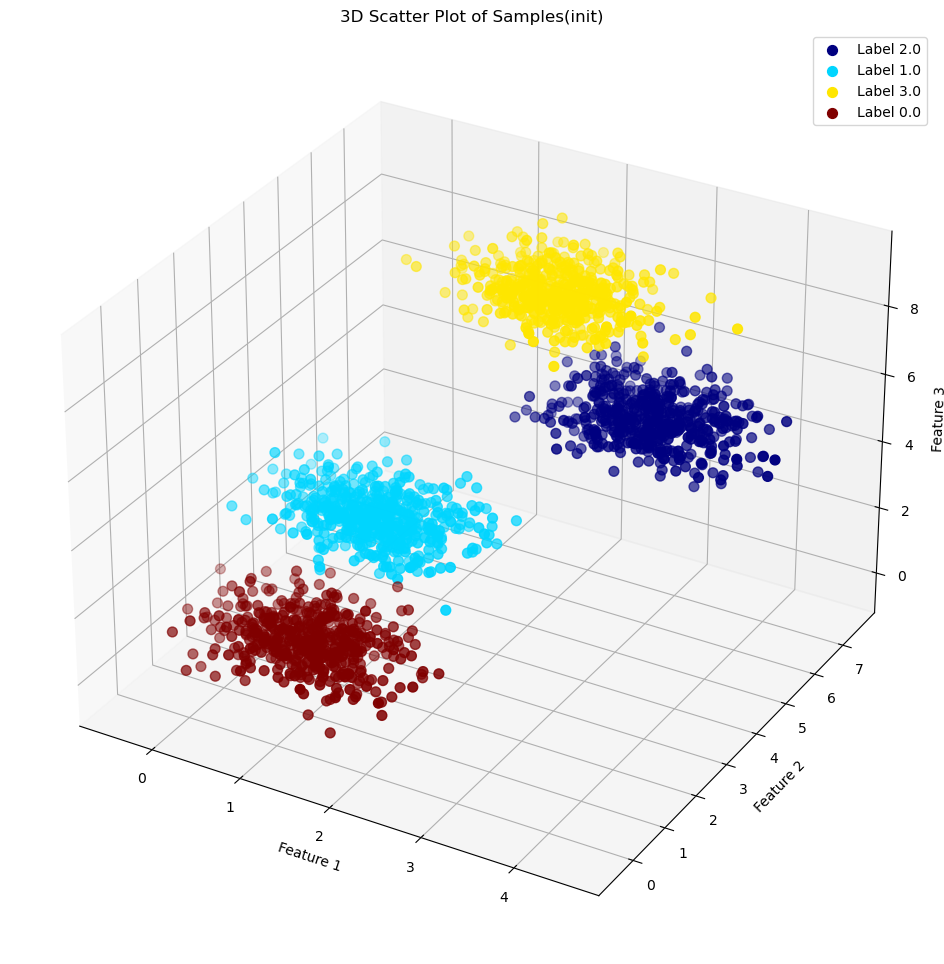

In [20]:
# 根据实验要求，绘制一下初始的样本分布情况，不同颜色表示不同的类的样本，三维坐标对应到样本的三个特征

colors = plt.cm.jet(np.linspace(0, 1, len(labels)))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(labels, colors):
    subset = usedata[usedata['Label'] == label]
    ax.scatter(subset['feature1'], subset['feature2'], subset['feature3'], s=50, color=color, label=f'Label {label}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.legend()
ax.set_title('3D Scatter Plot of Samples(init)')
plt.show()

一起实现基础和中级要求中的三个方法

In [10]:
# 计算两个样本的欧氏距离
def d(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

# 实现单连接距离
def single_linkage_distance(Gp, Gq, initmatrix):
    # 提取两个聚类之间的所有距离，并返回最小值
    return min(initmatrix[i, j] for i in Gp for j in Gq)

# 实现全连接距离
def complete_linkage_distance(Gp, Gq, initmatrix):
    # 提取两个聚类之间的所有距离，并返回最大值
    return max(initmatrix[i, j] for i in Gp for j in Gq)

# 实现平均连接距离
def average_linkage_distance(Gp, Gq, initmatrix):
    # 提取两个聚类之间的所有距离，计算平均值并返回
    distances = [initmatrix[i, j] for i in Gp for j in Gq]
    return sum(distances) / len(distances)



# 初始化距离矩阵（欧式距离矩阵）
def initialize_distance_matrix(data):
    n = data.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = d(data[i], data[j])
    return distance_matrix

# 找到要合并的最近的两个聚类
def find_clusters_to_merge(distance_matrix):
    triu_indices = np.triu_indices_from(distance_matrix, k=1)
    i, j = min(zip(*triu_indices), key=lambda indices: distance_matrix[indices])
    return i, j

# 聚类算法
def agglomerative_clustering(data, num_clusters=4, linkage='single'):
    distance_matrix = initialize_distance_matrix(data)
    initmatrix=distance_matrix
    clusters = {i: [i] for i in range(len(data))}
    count = 0
    while len(clusters) > num_clusters:
        i, j = find_clusters_to_merge(distance_matrix)
        
        count+=1
        print(count)


        # 合并聚类
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]

         # 从距离矩阵中删除已合并的聚类的行和列
        distance_matrix = np.delete(distance_matrix, j, axis=0)
        distance_matrix = np.delete(distance_matrix, j, axis=1)

        clusters = {idx: (clusters[idx] if idx < j else clusters[idx + 1]) for idx in range(len(clusters))}
        # 更新距离矩阵
        for k in clusters:
            if k !=i:
                if linkage == 'single':
                    distance_matrix[i, k] = distance_matrix[k, i] = single_linkage_distance(clusters[i], clusters[k], initmatrix)
                elif linkage == 'complete':
                    distance_matrix[i, k] = distance_matrix[k, i] = complete_linkage_distance(clusters[i], clusters[k], initmatrix)
                elif linkage == 'average':
                    distance_matrix[i, k] = distance_matrix[k, i] = average_linkage_distance(clusters[i], clusters[k], initmatrix)

    return clusters

### 实现 single-linkage 层次聚类算法


**最短距离/单链接 (single linkage):**
   $$ D_{pq} = \min \{d_{ij} | x_i \in G_p, x_j \in G_q\} $$

In [11]:
usedataarray = usedata.iloc[:, :-1].to_numpy()
singleclusters=agglomerative_clustering(usedataarray, 4, 'single')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


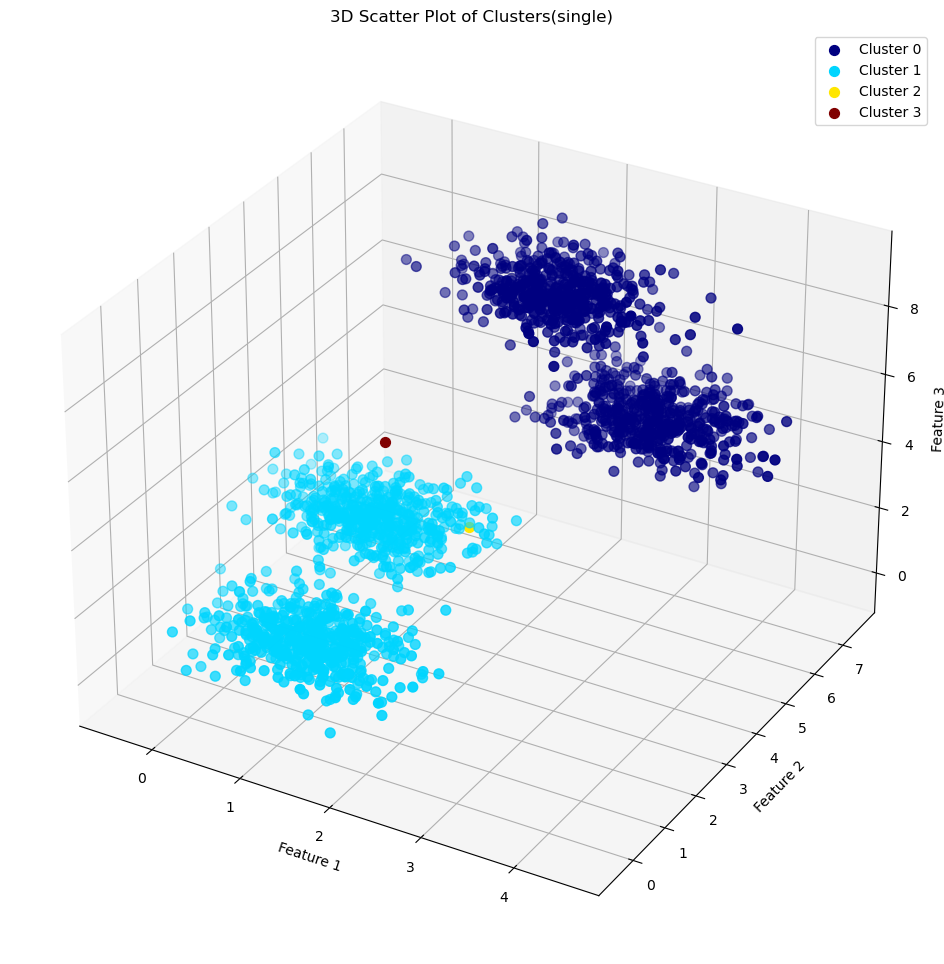

In [12]:
# 画出分布图
colors = plt.cm.jet(np.linspace(0, 1, len(singleclusters)))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, indices in singleclusters.items():
    # 根据索引列表从DataFrame中选取数据
    subset = usedata.loc[indices]
    ax.scatter(subset['feature1'], subset['feature2'], subset['feature3'], s=50, color=colors[cluster_label], label=f'Cluster {cluster_label}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.legend()
ax.set_title('3D Scatter Plot of Clusters(single)')
plt.show()

### 实现 complete-linkage 层次聚类算法

**最长距离/全链接 (complete linkage):**
   $$ D_{pq} = \max \{d_{ij} | x_i \in G_p, x_j \in G_q\} $$

In [13]:
completeclusters=agglomerative_clustering(usedataarray, 4, 'complete')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


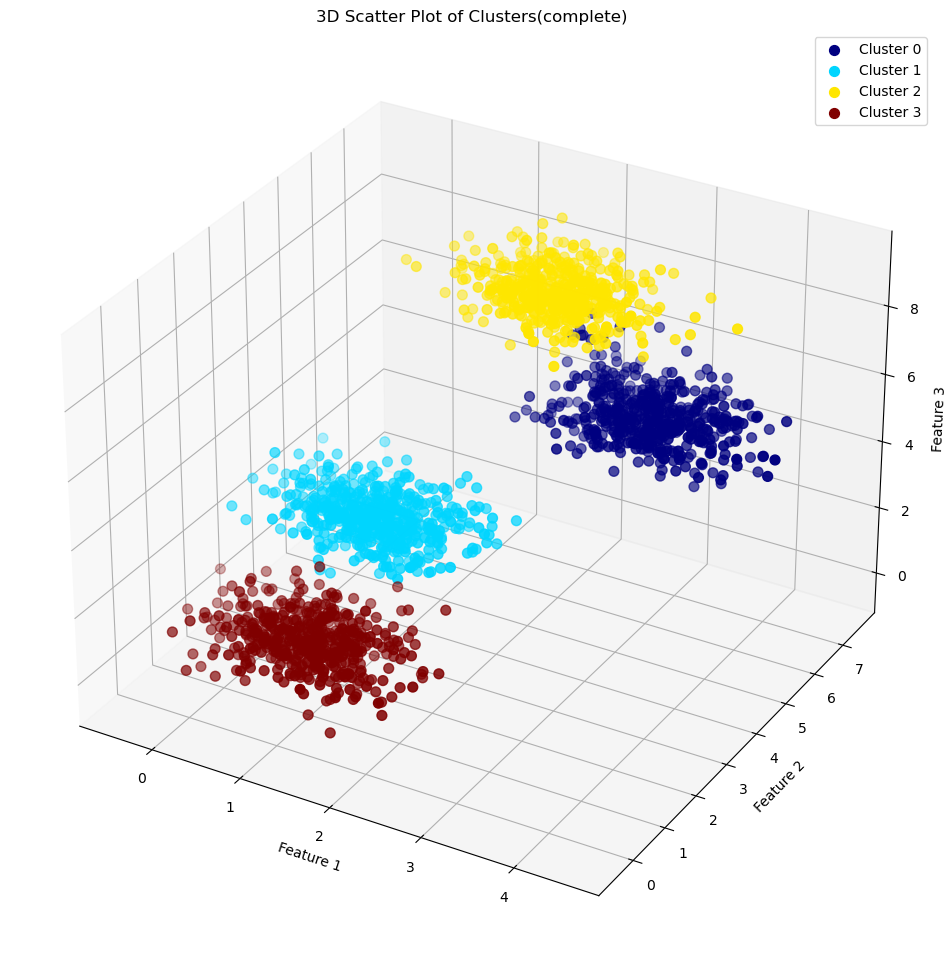

In [14]:
# 画出分布图
colors = plt.cm.jet(np.linspace(0, 1, len(completeclusters)))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, indices in completeclusters.items():
    # 根据索引列表从DataFrame中选取数据
    subset = usedata.loc[indices]
    ax.scatter(subset['feature1'], subset['feature2'], subset['feature3'], s=50, color=colors[cluster_label], label=f'Cluster {cluster_label}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.legend()
ax.set_title('3D Scatter Plot of Clusters(complete)')
plt.show()

## 中级要求部分

**平均距离 (average linkage):**
   $$ D_{pq} = \frac{1}{n_p n_q} \sum_{x_i \in G_p, x_j \in G_q} d_{ij} $$




In [15]:
averageclusters=agglomerative_clustering(usedataarray, 4, 'average')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


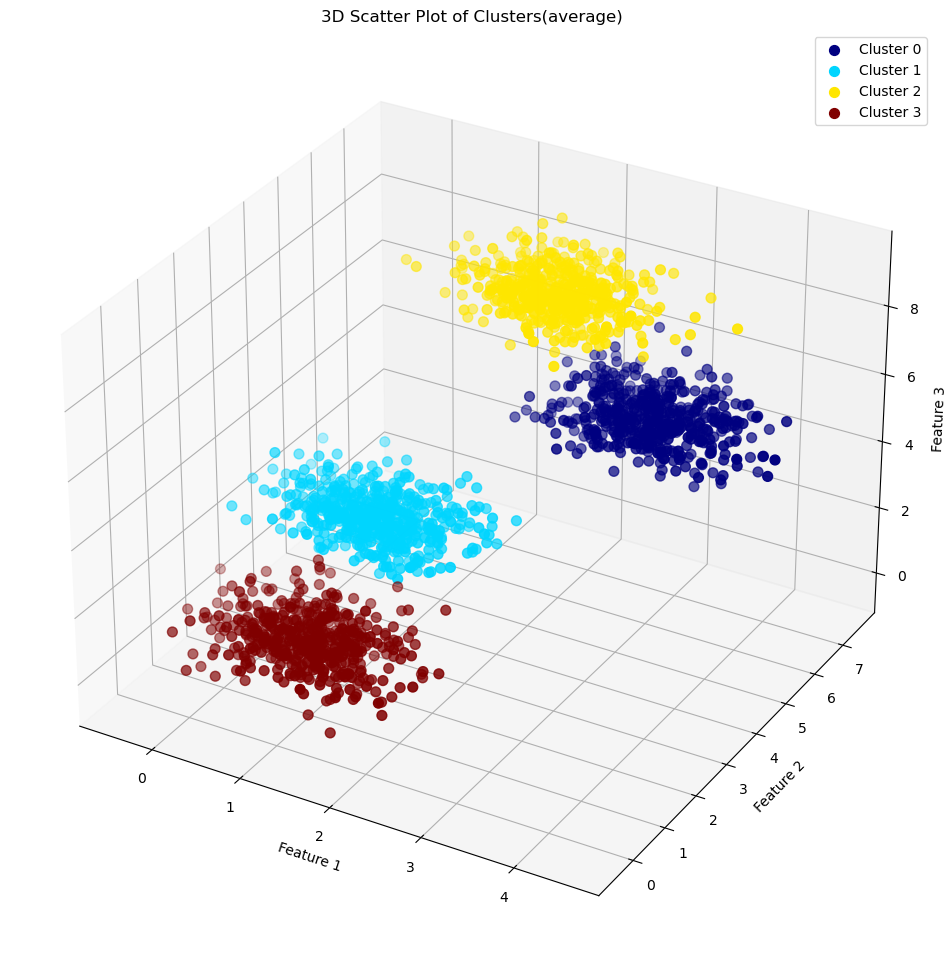

In [16]:
# 画出分布图
colors = plt.cm.jet(np.linspace(0, 1, len(averageclusters)))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, indices in averageclusters.items():
    # 根据索引列表从DataFrame中选取数据
    subset = usedata.loc[indices]
    ax.scatter(subset['feature1'], subset['feature2'], subset['feature3'], s=50, color=colors[cluster_label], label=f'Cluster {cluster_label}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.legend()
ax.set_title('3D Scatter Plot of Clusters(average)')
plt.show()

## 高级要求部分



通过上述实验，我们可以明显的看出，使用average-linkage算法和complete-linkage算法的实验结果明显优于使用single-linkage的实验结果。（可以看到使用单连接算法的结果和原始分布差距非常大，而另外两种算法的结果和源分布差距不大）具体分析如下：

- 在单连接（Single Linkage）方法中，聚类的合并基于最小距离准则。这可能导致即使从整体上看两个聚类相距较远，但只要它们之间有少数几个距离较近的点，这两个聚类就会被合并。这种基于最近点的合并策略可能引发所谓的“链接效应”（Chaining Effect），进而形成较为松散的聚类结构。因此，单连接方法在某些情况下可能表现不佳。在这次给定的数据集上其聚类效果就不太好。

- 完全连接（Complete Linkage）方法在处理离群点时表现欠佳。即便两个聚类整体上非常接近，但只要存在一些距离较远的点，这两个聚类就不会被合并。单连接和完全连接这两种相似度计算方法的共同问题在于，它们仅依赖于特定的极端数据点，而没有考虑到聚类内部数据的整体特性。但是根据结果你可以看到其实在这次给定的数据中这个算法表现也较好。

- 平均连接（Average Linkage）方法考虑了两个集合中所有点对的平均距离。这种方式在某种程度上能够更好地反映聚类之间的整体相似度，不会因为个别极端值或边界点而受到过多影响。相比之下，平均连接方法通常能得到更为合理的聚类结果。这个算法无论面对什么样子的数据分布都能得出更稳定更合理的结果。

## 扩展要求

通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析，这里性能指标我使用轮廓系数作为性能评价指标，这里为了节省时间我直接调用了sklearn库中的函数进行轮廓系数计算

In [17]:
# 这里我选择轮廓系数作为性能评价指标
from sklearn.metrics import silhouette_score

def test_clustering_performance(data, cluster_range, linkage_methods):
    results = {}

    for linkage in linkage_methods:
        results[linkage] = []

        for n_clusters in cluster_range:
            # 调用聚类函数
            clusters = agglomerative_clustering(data, n_clusters, linkage)

            # 创建一个标签数组，用于轮廓系数计算
            labels = np.zeros(data.shape[0])
            for cluster_label, indices in clusters.items():
                labels[indices] = cluster_label

            # 计算轮廓系数
            score = silhouette_score(data, labels)
            results[linkage].append(score)

    return results

# 定义测试的聚类数范围和链接方法
cluster_range = range(3,11)
linkage_methods = ['single', 'complete', 'average']

# 测试聚类性能
usedataarray = usedata.iloc[:, :-1].to_numpy()
performance_results = test_clustering_performance(usedataarray, cluster_range, linkage_methods)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


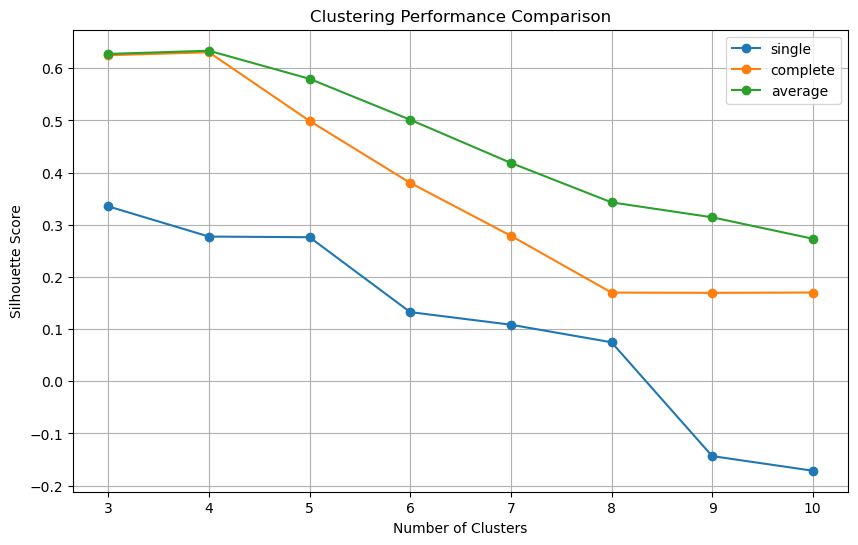

In [19]:
# 绘制折线图
plt.figure(figsize=(10, 6))
for method, scores in performance_results.items():
    plt.plot(cluster_range, scores, marker='o', label=method)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Clustering Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

#### 性能结果分析

通过上图可以观察到：（轮廓系数是越接近于1说明效果越好）
- Single-Linkage算法效果最差，而且波动性相对最强。Complete-Linkage算法效果中等，波动性中等，其中Average-Linkage算法效果最好，而且波动性最小。
- 随着聚类个数越多，可以看出Average-Linkage算法的层次聚类对于类间分离程度和类内紧致性表现最好。对于Average-Linkage算法和Complete-Linkage算法来说，聚类数为4的时候效果最好，之后随着聚类数量增加，效果逐渐变差，这也与我们的原始数据分布相符。对于Single-Linkage算法来说，随着聚类数量增加，效果一直变差，而且下降幅度很大，而且并没有在聚类数量为4的时候出现峰值，这里的解释可以参考上文基础要求中的算法结果分布，可以看到其效果和原始数据分布差距非常大，所以这一点也可以理解的。
- 从绝对值的角度上看，其中最好的值也不过0.6上下，说明数据集本身的点区分度也不是特别高，这一点与算法本身无关。
